# Nitrogen Oxides(NOx) Level Analysis in Air Quality

### Data Set Information:

* The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. 
* The device was located on the field in a significantly polluted area, at road level,within an Italian city. 
* Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. 
* Missing values are tagged with -200 value.

### Attribute Information:
0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. Relative Humidity (%)
14. AH Absolute Humidity

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv('AirQualityUCI.csv', sep=',', delimiter=";",decimal=",")

In [196]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [197]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the shape(dimensions) of the dataset.

In [198]:
data.shape

(9471, 17)

Checking the Information about the dataset by using info()

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


From the info() we can see the following things:
*   There are 17 columns
*   There are 9471 records
*   There are:
> * Number of datetime column: 01
> * Number of float datatype column(s): 15
> * Number of object datatype column: 01









## **Data Cleaning**

In [0]:
#Deleting the Unnamed: 15 and Unnamed: 16 columns.
data = data.drop(["Unnamed: 15","Unnamed: 16"], axis=1)

In [201]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [202]:
data.shape

(9471, 15)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


Checking the missing data in our dataset:

In [204]:
data.isnull().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
NMHC(GT)         True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
dtype: bool

In [205]:
data.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [206]:
#Deleting all Null values in our dataset permanently.
data.dropna(inplace=True)
data.shape

(9357, 15)

In [0]:
data.set_index("Date", inplace=True) 
#setting Date column as new index of out dataframe.

In [208]:
data.head(1)

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578


In [209]:
data.index = pd.to_datetime(data.index) #Converting the index in datetime datatype.
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [210]:
data.head(1)

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578


In [211]:
data['Time'] = pd.to_datetime(data['Time'],format= '%H.%M.%S').dt.hour #Selecting only Hour value from the 'Time' Column.
type(data['Time'][0])

numpy.int64

In [212]:
data.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-10-03,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-10-03 to 2005-04-04
Data columns (total 14 columns):
Time             9357 non-null int64
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13), int64(1)
memory usage: 1.4 MB


In [214]:
data.describe()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,6.923182,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,5.000000,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,11.000000,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,18.000000,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## **Handling Missing Data**

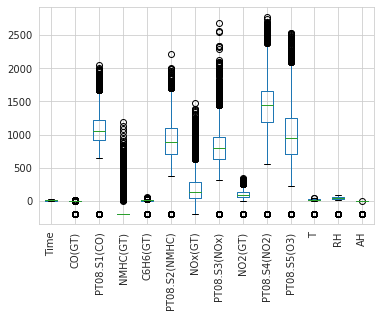

In [215]:
data.plot.box()
plt.xticks(rotation = 'vertical')
plt.show()

Replacing -200 with NaN(null value) as it given in dataset information that Missing values are tagged with -200 value.

In [0]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)

In [217]:
data.isnull().any()

Time             False
CO(GT)            True
PT08.S1(CO)       True
NMHC(GT)          True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

In [218]:
data.isnull().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

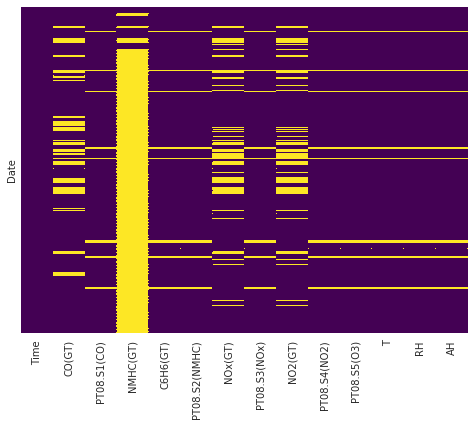

In [219]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [0]:
data.drop('NMHC(GT)', axis=1, inplace=True)

In [221]:
data.describe()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,7674.000000,8991.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,11.498557,2.152750,1099.833166,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,6.923182,1.453252,217.080037,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.000000,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,5.000000,1.100000,937.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,11.000000,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,18.000000,2.900000,1231.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,23.000000,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [222]:
data.shape

(9357, 13)

#### filling the null values with median

In [0]:
data.fillna(data.median(), inplace=True)

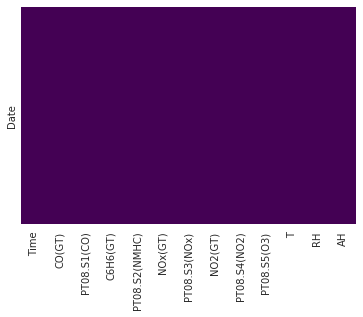

In [224]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### **Data Visualization**

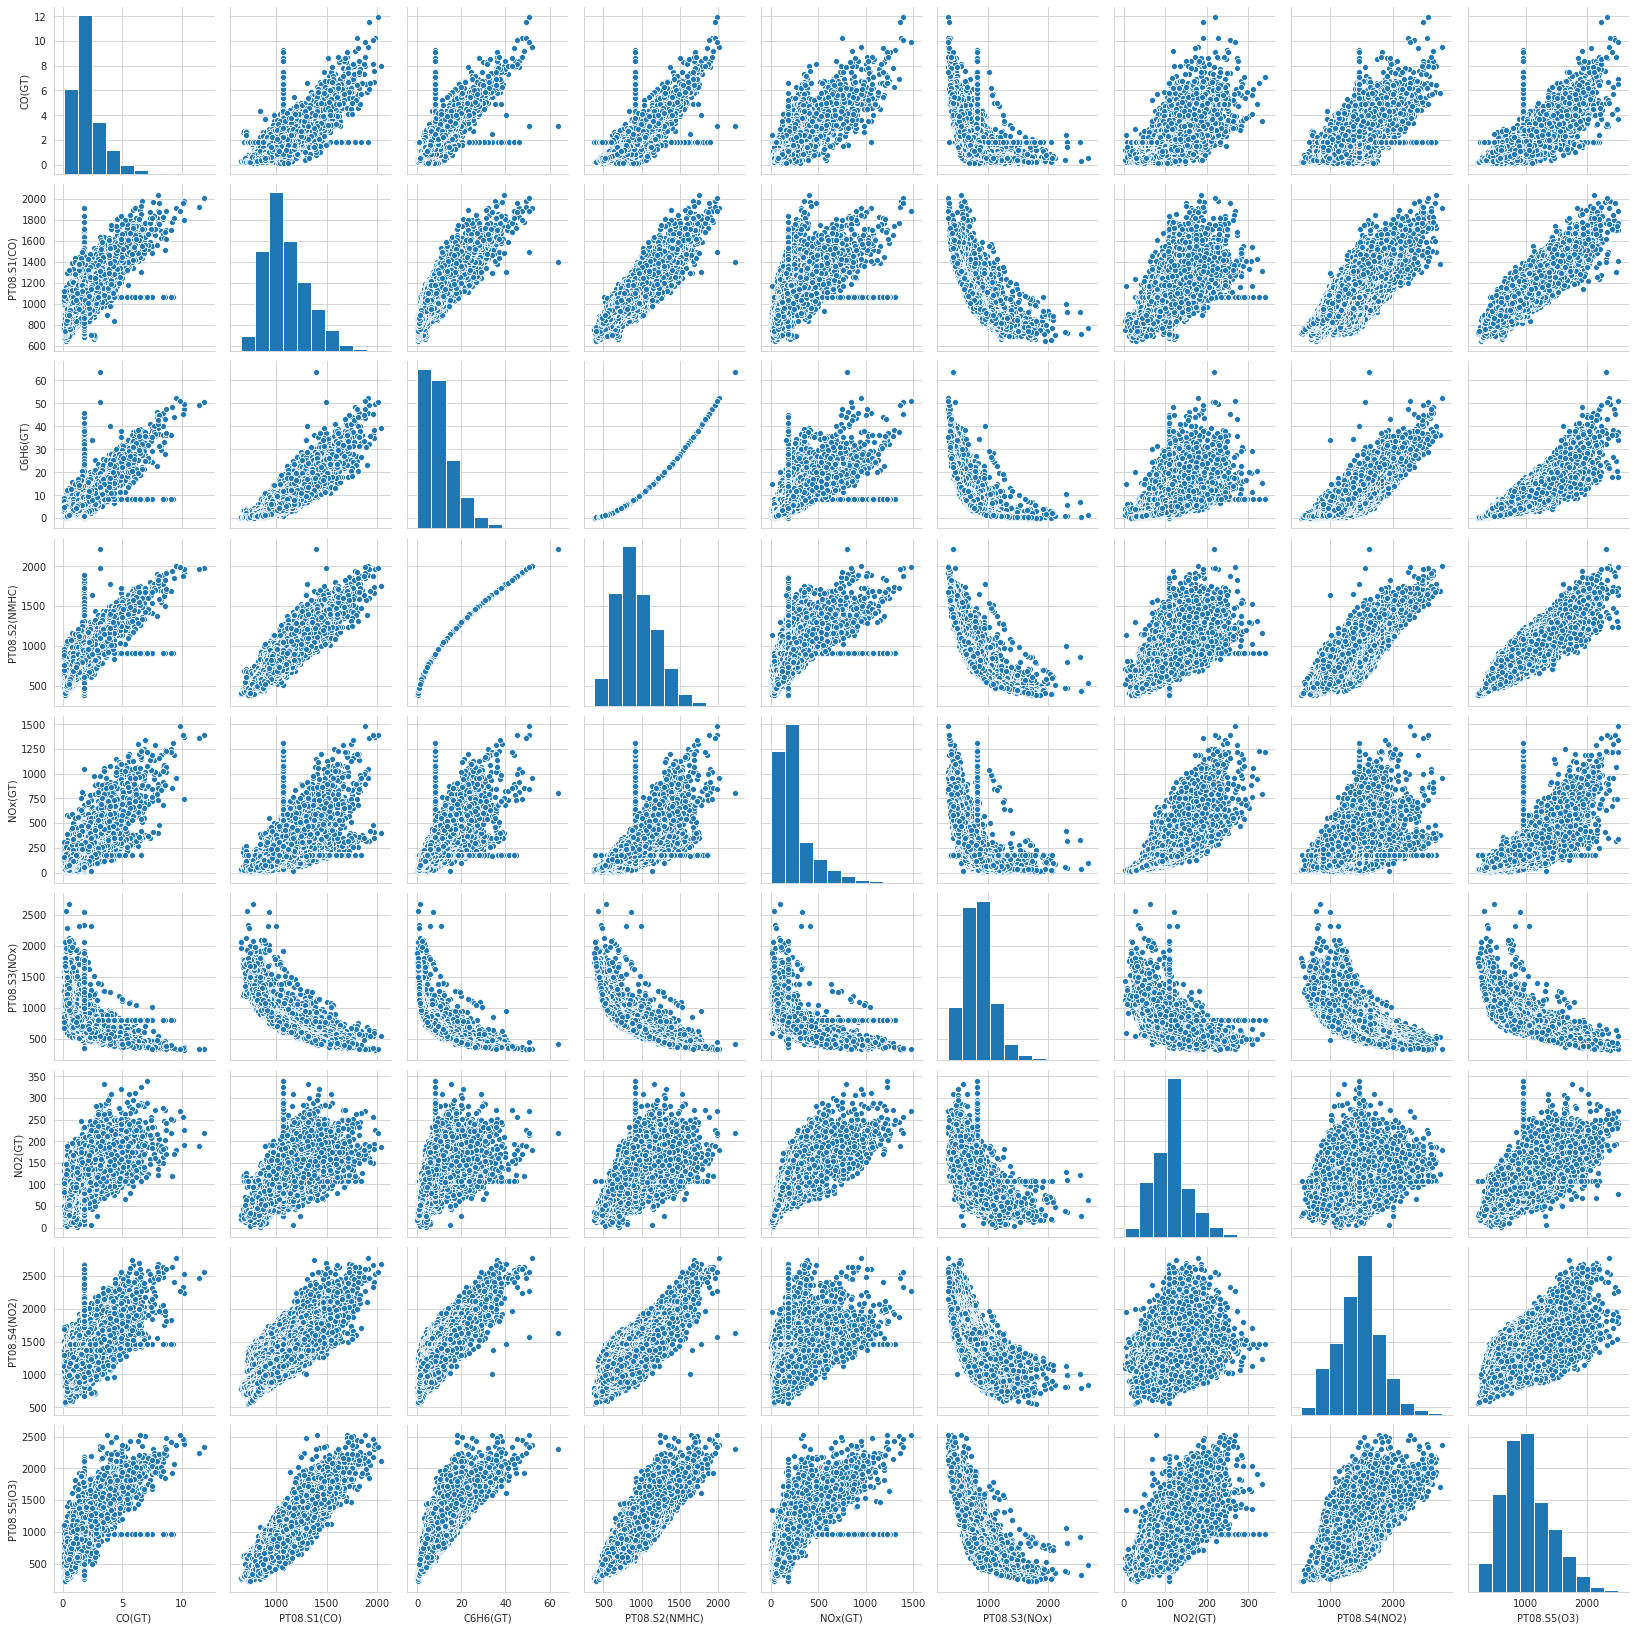

In [225]:
sns.set_style('whitegrid')
eda_data = data.drop(['Time','RH','AH','T'], axis=1)
sns.pairplot(eda_data)

**Histogram:**

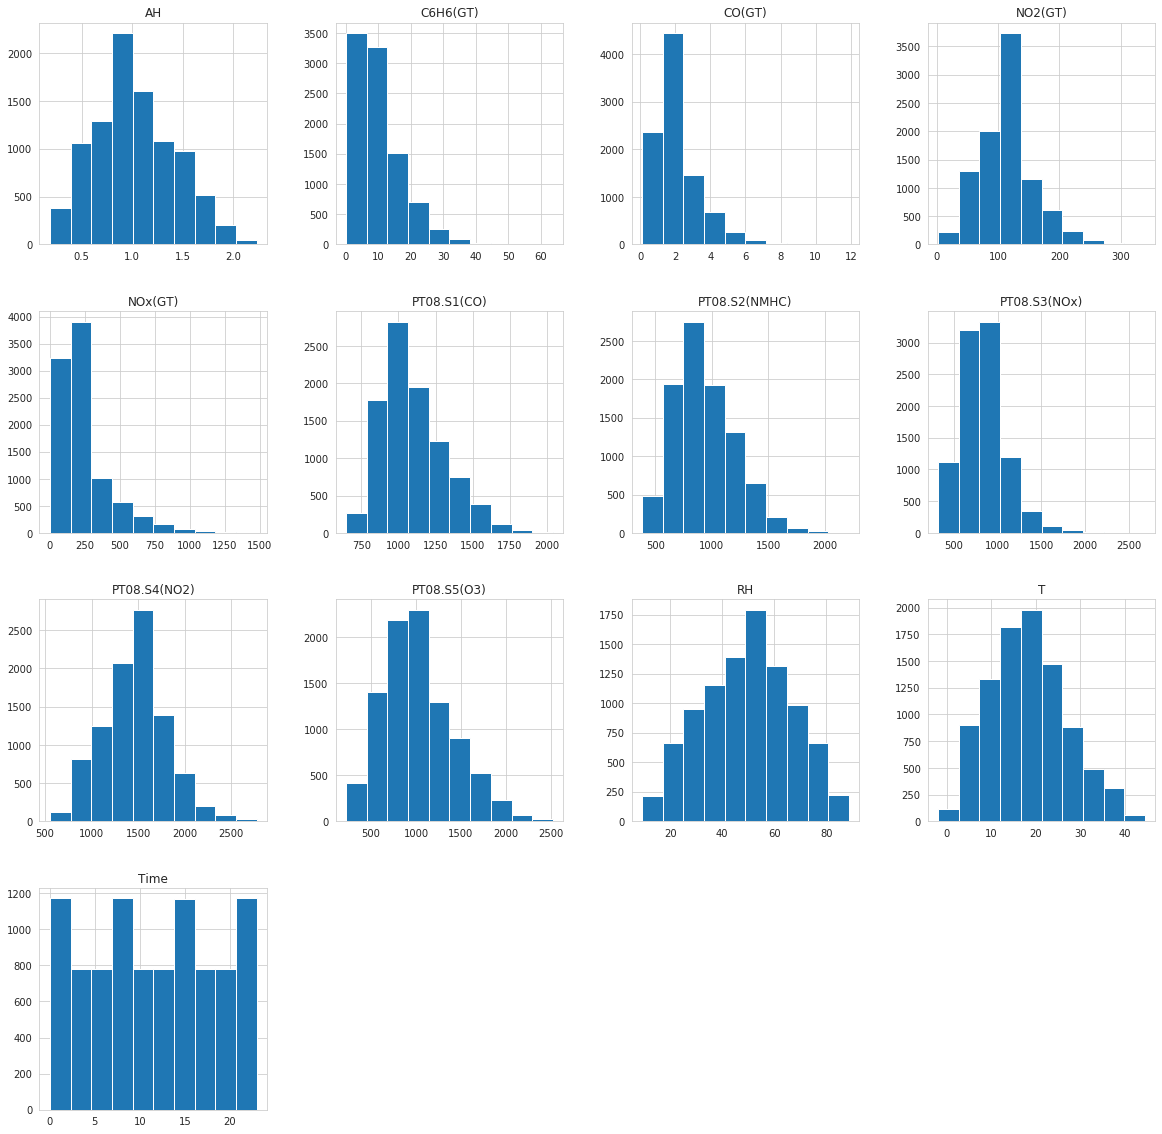

In [226]:
data.hist(figsize = (20,20))
plt.show()

From the histogram, we can observe the variability of each attribute.
Also we can observe the skewness of data.

**Distplot:**

Text(0.5, 1.0, "All Toxic Gases' Frequency by Month")

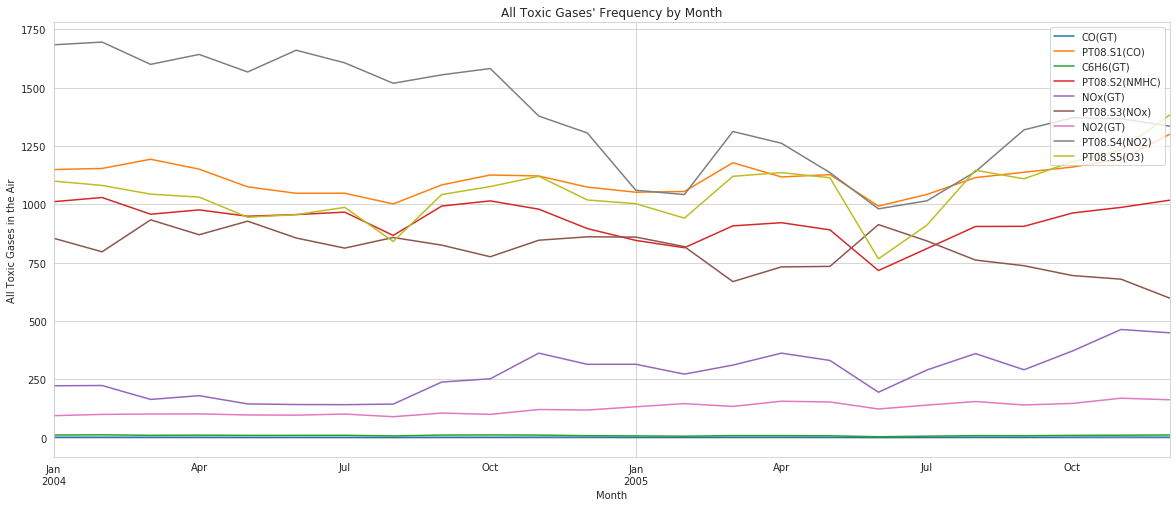

In [227]:
data.drop(['Time','RH','AH','T'], axis=1).resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title("All Toxic Gases' Frequency by Month")

In the above graph, you can see the frequency of all toxics that is usually in polluted air. The Brown line shows Nitrogen Oxides (NOx) and Yellow line shows NO2 which is part of NOx. It is a mixture of gases are composed of nitrogen and oxygen. Two of the most toxicologically significant compounds are nitric oxide (NO) and nitrogen dioxide (NO2). I chose Nitrogen Oxides(NOx) because these are one of the most dangerous forms of air pollution and are most relevant for air pollution. However, There are many others ways to measure air pollution, including PM10 (particulate matter around between 2.5 and 10 microns in diameter), carbon monoxide, sulfur dioxide, nitrogen dioxide, ozone (O3), etc.

NOx is produced from the reaction of nitrogen and oxygen gases in the air during combustion, especially at high temperatures. In areas of high motor vehicle traffic, such as in large cities, the amount of nitrogen oxides emitted into the atmosphere as air pollution can be significant.

It is mainly due to fossil fuel combustion from both stationary sources, i.e. power generation (21%), and mobile sources, i.e. transport (44%). Other atmospheric contributions come from non-combustion processes, for example nitric acid manufacture, welding processes and the use of explosives.

In addition, these create serious health issues. These mainly impact on respiratory conditions causing inflammation of the airways at high levels. Long term exposure can decrease lung function, increase the risk of respiratory conditions and increases the response to allergens. NOx also contributes to the formation of fine particles (PM) and ground level ozone, both of which are associated with adverse health effects.

Ref: https://www.epa.gov/no2-pollution/basic-information-about-no2#Effects

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Level by Month')

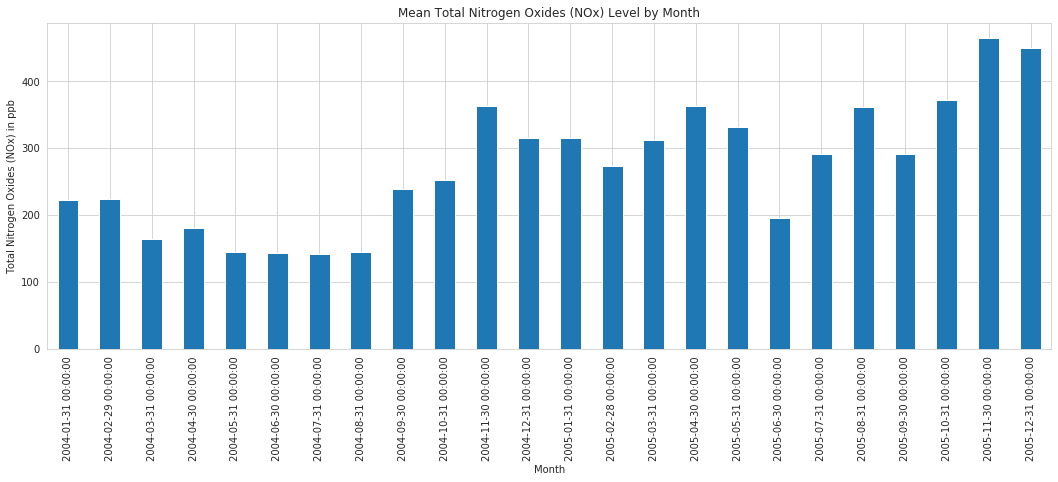

In [228]:
data['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Level by Month")

We can see that initially, the Nitric Oxide levels are low but as the year pass, the Nitric Oxide level is increased.

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Frequency During Days')

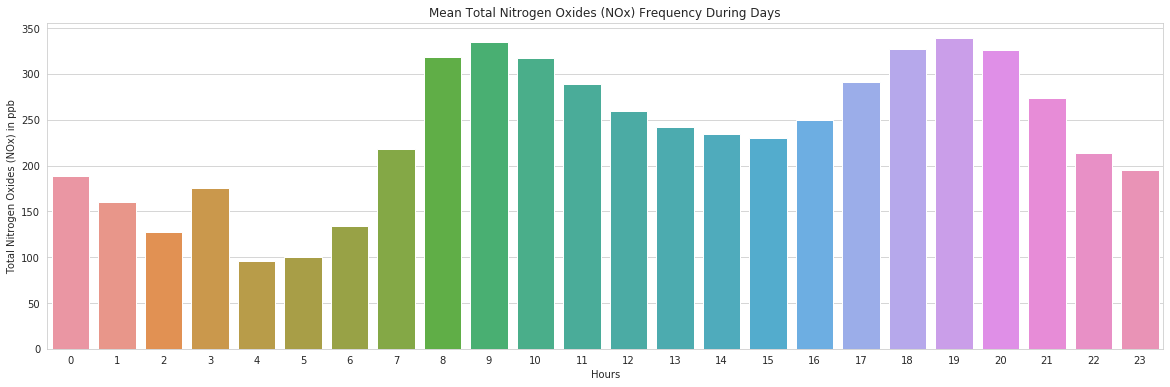

In [229]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NOx(GT)',data=data, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")

Here, the graph shows an average of Oxides of Nitrogen level with hours. It seems during the day, its level is high compared to night because of high use of transportations, phones, other electronics etc.

The Environmental Protection Agency (EPA) set a 1-hour NOx standard at the level of 100 parts per billion (ppb). (Ref: https://www.airnow.gov/index.cfm?action=pubs.aqiguidenox)

Here, this data shows, air has large amount of NOx compare to its standard measurement which is not good.

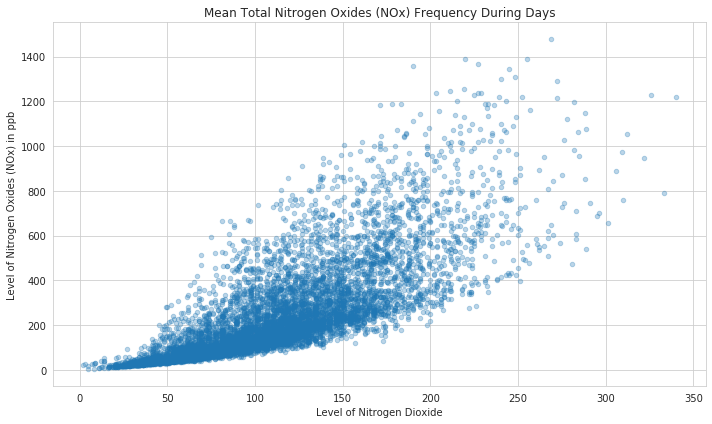

In [230]:
data.plot(x='NO2(GT)',y='NOx(GT)', kind='scatter', figsize = (10,6), alpha=0.3)
plt.xlabel('Level of Nitrogen Dioxide')
plt.ylabel('Level of Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")
plt.tight_layout();

Checking the Correlation between each attributes.

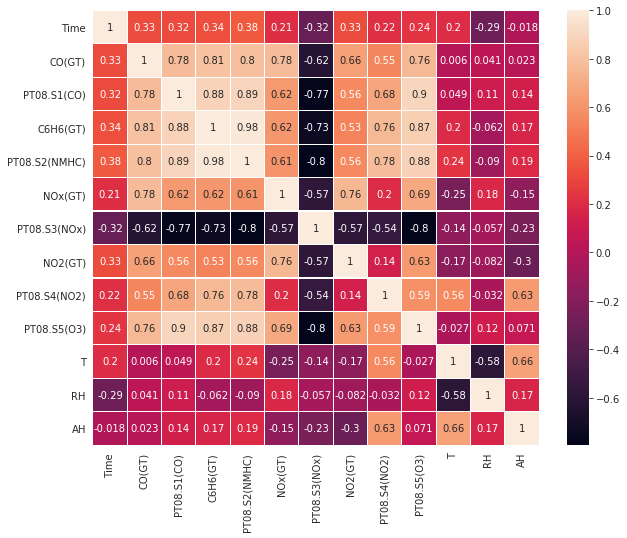

In [231]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths=.20)

KDEPlot of Nitric Oxide:

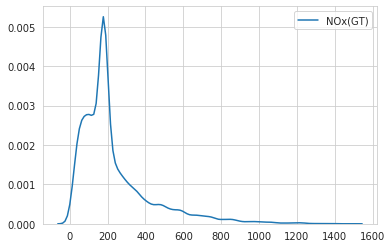

In [232]:
sns.kdeplot(data['NOx(GT)'])
plt.show()

Plotting of Nitric oxide:

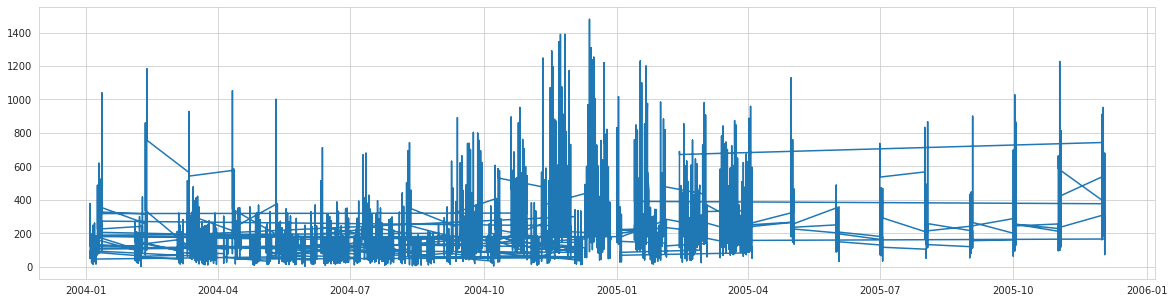

In [233]:
plt.figure(figsize=(20,5))
plt.plot(data['NOx(GT)'])
plt.show()

According to above graph, the maximum level of Nitric Oxide is spotted between September 2004 to April 2005

Let's check the trend of Nitrogen gas:

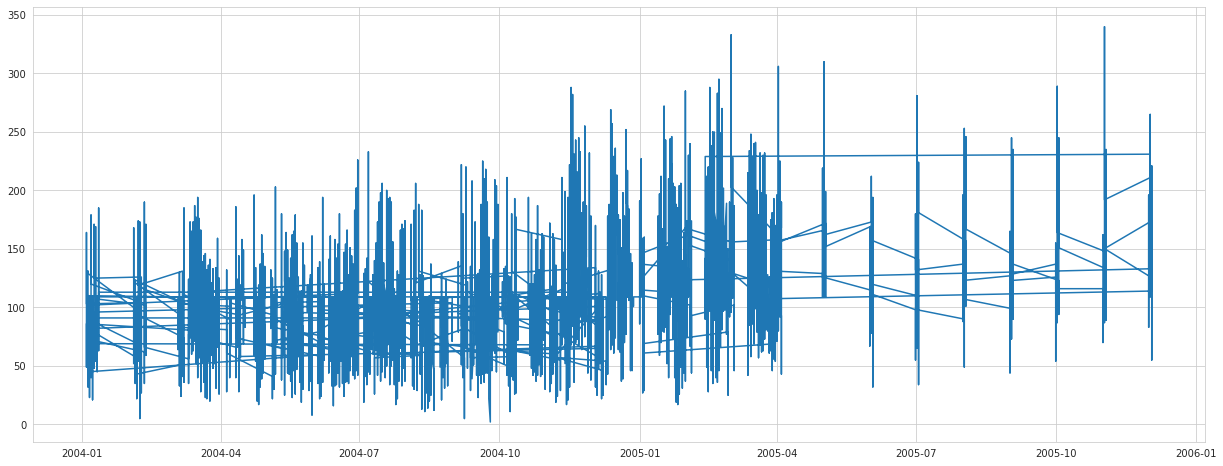

In [234]:
plt.figure(figsize=(21,8))
plt.plot(data['NO2(GT)'])
plt.show()

From the beginning of 2004 to April 2005, there is much more level of Nitrogen gas.

In [235]:
data.shape

(9357, 13)

## **Machine Learning**

### Training a **Linear Regression** Model

In [0]:
X = data.drop(['NOx(GT)','Time'], axis=1)

y= data['NOx(GT)']

### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Scaling and Transformation

In [0]:
from sklearn.preprocessing import RobustScaler

sc=RobustScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Creating and Training the Model

In [239]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

In [240]:
print(lm.intercept_)

178.93120974954496


In [241]:
coeff_data = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO(GT),106.489307
PT08.S1(CO),-17.958165
C6H6(GT),72.618960
PT08.S2(NMHC),64.090067
PT08.S3(NOx),23.528373
NO2(GT),71.007684
PT08.S4(NO2),-167.912857
PT08.S5(O3),33.402980
T,35.608869
RH,72.930693


From above coefficient values, we can say: if 1 unit increases in Benzene (C6H6), NOx increases by 72.62. Same as, if 1 unit increases in Nitrogen Dioxide(NO2) and Relative Humidity(RH), Oxides of Nitrogen will increase by 71 points and 72.9 points, respectively.

####Prediction Model

Text(0.5, 1.0, 'Linear Regression Predicted vs Actual')

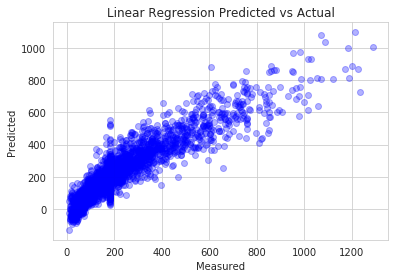

In [242]:
prediction = lm.predict(x_test)
plt.scatter(y_test, prediction, c="blue", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')

 Accuracy on Training Dataset

In [243]:
score_train = lm.score(x_train, y_train)
score_train

0.8233171312216774

 Accuracy on Test Dataset

In [0]:
prediction = lm.predict(x_test)

In [245]:
score_test = lm.score(x_test, y_test)
score_test

0.82353224471828

Residualt Histogram


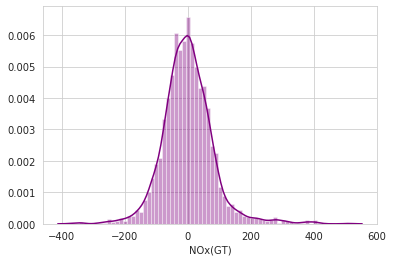

In [246]:
sns.distplot((y_test-prediction), bins=70, color="purple")


In [247]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, prediction))
print('MSE:',metrics.mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 58.259165156741126
MSE: 6535.814786000029
RMSE: 80.84438623676989


In [248]:
coeff_data

,Coefficient
CO(GT),106.489307
PT08.S1(CO),-17.958165
C6H6(GT),72.618960
PT08.S2(NMHC),64.090067
PT08.S3(NOx),23.528373
NO2(GT),71.007684
PT08.S4(NO2),-167.912857
PT08.S5(O3),33.402980
T,35.608869
RH,72.930693


If we hold all other varibles constant and 1 point increases in CO(GT), NOx will increase by 49.81. Simillarly, If we hold all other varibles constant and 1 point increases in NO2(GT), NOx will increase by 1.48. and, If we hold all other varibles constant and 1 point increases in C6H6(GT), NOx will increase by 11.94.


### **K-Nearest Neighbors Algorithm (KNN)**

In [249]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

####Prediction Model

Text(0.5, 1.0, 'K-nearest Neighbors Predicted vs Actual')

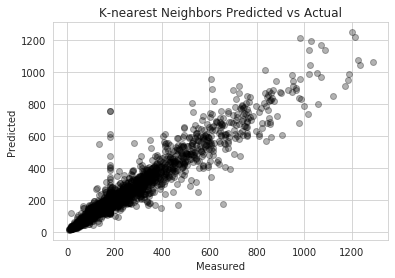

In [250]:
prediction = knn.predict(x_test)
plt.scatter(y_test, prediction, c="black", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('K-nearest Neighbors Predicted vs Actual')

 Accuracy on Training Dataset

In [251]:
knn_train = knn.score(x_train,y_train)
knn_train

0.9512990712078929

Accuracy on Test Dataset

In [252]:
kreg_test = knn.score(x_test,y_test)
kreg_test

0.9156921884063907

### HyperParameter Tuning

In [0]:
from sklearn.neighbors import KNeighborsRegressor
kreg=KNeighborsRegressor()

In [0]:
para={'n_neighbors':np.arange(1,51),'weights':['uniform','distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':np.arange(10,51)}

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [256]:
knn_cv=RandomizedSearchCV(kreg,para,cv=5,random_state=0)
knn_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,...
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 2

In [257]:
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.9172758964538238
{'weights': 'distance', 'n_neighbors': 12, 'leaf_size': 18, 'algorithm': 'brute'}


In [258]:
kn=KNeighborsRegressor(weights='distance', n_neighbors= 12, leaf_size= 18, algorithm= 'brute')
kn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=18, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')

####Prediction Model

Text(0.5, 1.0, 'K-nearest Neighbors(Hyper) Predicted vs Actual')

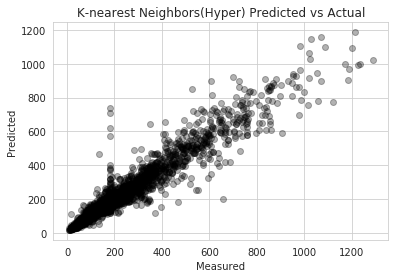

In [259]:
prediction = kn.predict(x_test)
plt.scatter(y_test, prediction, c="black", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('K-nearest Neighbors(Hyper) Predicted vs Actual')

In [260]:
#Accuracy on Training data
knn_train=kn.score(x_train,y_train)
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [261]:
#Accuracy on Training data
knn_test=knn.score(x_test,y_test)
knn_test

0.9156921884063907

### **Decision Tree Regressor Algorithm**

In [262]:
from sklearn.tree import DecisionTreeRegressor
dreg=DecisionTreeRegressor()
dreg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

####Prediction Model

Text(0.5, 1.0, 'Decision Tree Predicted vs Actual')

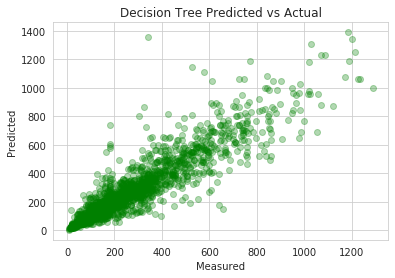

In [263]:
prediction = dreg.predict(x_test)
plt.scatter(y_test, prediction, c="green", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')

Accuracy on Training Data

In [264]:
dreg_train = dreg.score(x_train,y_train)
dreg_train

0.9997173176800791

Accuracy on Test Data

In [265]:
dreg_test = dreg.score(x_test,y_test)
dreg_test

0.8390491266602376

### HyperParameter Tuning

In [0]:
from sklearn.tree import DecisionTreeRegressor
d=DecisionTreeRegressor()

In [0]:
Param_grid={'splitter':['best','random'],'max_depth':[None,2,3,4,5],'min_samples_leaf':np.arange(1,9),
            'criterion':['mse','friedman_mse','mae'],'max_features':['auto','sqrt','log2',None]}

In [268]:
dt_cv=RandomizedSearchCV(d,Param_grid,cv=5,random_state=0)
dt_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [269]:
print(dt_cv.best_score_)
print(dt_cv.best_params_)

0.8607578521840338
{'splitter': 'best', 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': None, 'criterion': 'mse'}


In [270]:
dtr=DecisionTreeRegressor(splitter= 'best', min_samples_leaf= 8, max_features= 'auto', max_depth=None, criterion= 'mse')
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

####Prediction Model

Text(0.5, 1.0, 'Decision Tree(Hyper) Predicted vs Actual')

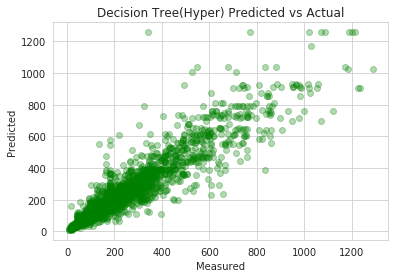

In [271]:
prediction = dtr.predict(x_test)
plt.scatter(y_test, prediction, c="green", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree(Hyper) Predicted vs Actual')

In [272]:
dtr_train=dtr.score(x_train,y_train)
dtr_train

0.9455802193274211

In [273]:
#Accuracy on Test Data
dtr_test=dtr.score(x_test,y_test)
dtr_test

0.8595334268001112

### **Random Forest Regressor Algorithm**

In [274]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor(n_estimators=10,random_state=0)
rfreg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

####Prediction Model

Text(0.5, 1.0, 'Random Forest Predicted vs Actual')

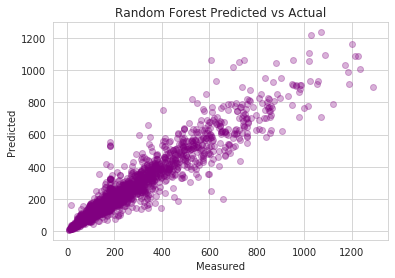

In [275]:
prediction = rfreg.predict(x_test)
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Predicted vs Actual')

Accuracy on Training data


In [276]:
rfreg_train = rfreg.score(x_train,y_train)
rfreg_train

0.9835791612405146

Accuracy on Test data


In [277]:
rfreg_test = rfreg.score(x_test,y_test)
rfreg_test

0.9072728395876658

### HyperParameter Tuning

In [0]:
rh=RandomForestRegressor()

In [0]:
par={'n_estimators':np.arange(1,91),'criterion':['mse','mae'],'max_depth':[2,3,4,5,None],
     'min_samples_leaf':np.arange(1,9),'max_features':['auto','sqrt','log2',None]}

In [280]:
rh_cv=RandomizedSearchCV(rh,par,cv=5,random_state=0)
rh_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [281]:
print(rh_cv.best_score_)
print(rh_cv.best_params_)

0.9180880912152487
{'n_estimators': 74, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'mse'}


In [282]:
reg=RandomForestRegressor(n_estimators= 74, min_samples_leaf= 2, max_features= 'log2', max_depth=None, criterion= 'mse')
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=74, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

####Prediction Model

Text(0.5, 1.0, 'Random Forest(Hyper) Predicted vs Actual')

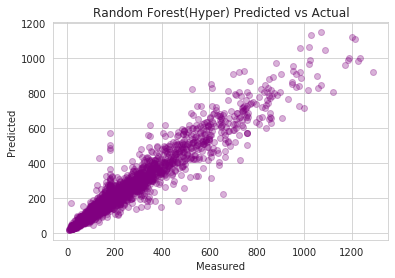

In [283]:
prediction = reg.predict(x_test)
plt.scatter(y_test, prediction, c="purple", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest(Hyper) Predicted vs Actual')

In [284]:
#Accuracy on Training data
reg_train=reg.score(x_train,y_train)
reg_train

0.9778219397045493

In [285]:
#Accuracy on Training data
reg_test=reg.score(x_test,y_test)
reg_test

0.9226561311936834

### **SVM Algorithm**

In [286]:
from sklearn.svm import SVR
sreg = SVR(kernel='linear')
sreg.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

####Prediction Model

Text(0.5, 1.0, 'SVM Predicted vs Actual')

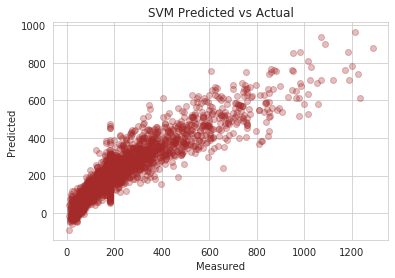

In [287]:
prediction = sreg.predict(x_test)
plt.scatter(y_test, prediction, c="brown", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('SVM Predicted vs Actual')

Accuracy on Training data


In [288]:
sreg_train = sreg.score(x_train,y_train)
sreg_train

0.7978523475229887

Accuracy on Test data

In [289]:
sreg_test = sreg.score(x_test,y_test)
sreg_test

0.8035017649743834

### **XGBoost Algorithm**

In [290]:
from xgboost import XGBRegressor
xreg = XGBRegressor()
xreg.fit(x_train, y_train)

[15:43:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

####Prediction Model

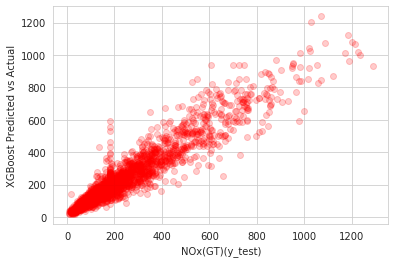

In [291]:
plt.scatter(y_test, xreg.predict(x_test),c="red", alpha=0.2)
plt.xlabel('NOx(GT)(y_test)')
plt.ylabel('XGBoost Predicted vs Actual')
plt.show()

Accuracy on Training data


In [292]:
xreg_train = xreg.score(x_train,y_train)
xreg_train

0.9225080903051677

Accuracy on Test data


In [293]:
xreg_test = xreg.score(x_test,y_test)
xreg_test

0.8939738418703633

###Hyper-parameter Optimization

In [0]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [0]:
## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [0]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xreg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [297]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 11.4min finished


[15:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['

In [298]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [299]:
from xgboost import XGBRegressor
xreg = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xreg.fit(x_train, y_train)

[15:55:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

####Prediction Model

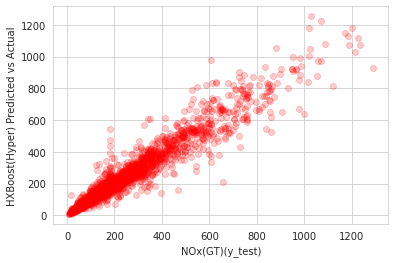

In [300]:
plt.scatter(y_test, xreg.predict(x_test),c="red", alpha=0.2)
plt.xlabel('NOx(GT)(y_test)')
plt.ylabel('HXBoost(Hyper) Predicted vs Actual')
plt.show()

In [301]:
#Accuracy on Training data
xreg_train = xreg.score(x_train,y_train)
xreg_train

0.9957238224474632

In [302]:
#Accuracy on Test Data
xreg_test = xreg.score(x_test,y_test)
xreg_test

0.9259378630818182

XGBoost is good but is little bit bias.

## **Accuracies(After HyperParameter Tuning)**

In [303]:
results = pd.DataFrame({'Algorithm':['Linear Regression','K-Nearest Neighbour Regressor','Decision Tree Regressor', 'Random Forest Regressor',
                                     'Support Vector Machine Regressor', 'XGBoost'],
                        'Train Accuracy':[score_train, knn_train, dtr_train,reg_train, sreg_train,xreg_train],
                        'Test Accuracy':[score_test, knn_test, dtr_test,reg_test, sreg_test,xreg_test]})
results.sort_values('Test Accuracy', ascending=False)

,Algorithm,Train Accuracy,Test Accuracy
5,XGBoost,0.995724,0.925938
3,Random Forest Regressor,0.977822,0.922656
1,K-Nearest Neighbour Regressor,0.999718,0.915692
2,Decision Tree Regressor,0.945580,0.859533
0,Linear Regression,0.823317,0.823532
4,Support Vector Machine Regressor,0.797852,0.803502


**Conclusion:** 
* Gases like CO, NOx, titania, and Benzene are increased in the air over time.
* The frequency of Oxides in Nitrogen is increasing
* During the day Nitrogen Oxides' level is high compared to night
* By looking at above table, we conclude that Random Forest regressor performed best and is not bias as there is not much difference between predicting the training and testing data.

##**Ensemble Learning**

###Applying Bagging on every algorithm one ny one.

In [0]:
from sklearn.ensemble import BaggingRegressor

In [305]:
m1=BaggingRegressor(LinearRegression()) #one method
m1.fit(x_train,y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [306]:
m2=BaggingRegressor(KNeighborsRegressor(weights='distance', n_neighbors= 12, leaf_size= 18, algorithm= 'brute'))
m2.fit(x_train,y_train)
  

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='brute',
                                                    leaf_size=18,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=12,
                                                    p=2, weights='distance'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [307]:
m3=BaggingRegressor(DecisionTreeRegressor(splitter= 'best', min_samples_leaf= 8, max_features= 'auto', max_depth=None, criterion= 'mse')) #one method
m3.fit(x_train,y_train)


BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=8,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap

In [308]:
m4=BaggingRegressor(RandomForestRegressor(n_estimators= 74, min_samples_leaf= 2, max_features= 'log2', max_depth=None, criterion= 'mse')) #one method
m4.fit(x_train,y_train)
#here low bias and low variance than decision tree algo

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='log2',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=2,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=74,
                                  

In [309]:
m5=BaggingRegressor(SVR(kernel='linear')) #one method
m5.fit(x_train,y_train)


BaggingRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma='scale', kernel='linear',
                                    max_iter=-1, shrinking=True, tol=0.001,
                                    verbose=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [310]:
m6=BaggingRegressor(XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1))
m6.fit(x_train,y_train)

[15:55:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

BaggingRegressor(base_estimator=XGBRegressor(base_score=0.25, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.1,
                                             max_delta_step=0, max_depth=10,
                                             min_child_weight=3, missing=None,
                                             n_estimators=100, n_jobs=1,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                             seed=None, silent=None,
   

###**Accuracies (After applying Bagging Regressor)**

In [311]:
results = pd.DataFrame({'Algorithm':['Linear Regression','K-Nearest Neighbour Regressor','Decision Tree Regressor', 'Random Forest Regressor',
                                     'Support Vector Machine Regressor', 'XGBoost'],
                        'Train Accuracy':[m1.score(x_train,y_train), m2.score(x_train,y_train), m3.score(x_train,y_train),
                                          m4.score(x_train,y_train), m5.score(x_train,y_train), m6.score(x_train,y_train)],
                        'Test Accuracy':[m1.score(x_test,y_test) , m2.score(x_test,y_test), m3.score(x_test,y_test),
                                         m4.score(x_test,y_test), m5.score(x_test,y_test), m6.score(x_test,y_test)]})
results.sort_values('Test Accuracy', ascending=False)

,Algorithm,Train Accuracy,Test Accuracy
5,XGBoost,0.983258,0.924016
3,Random Forest Regressor,0.959147,0.915818
1,K-Nearest Neighbour Regressor,0.987530,0.915783
2,Decision Tree Regressor,0.944095,0.897681
0,Linear Regression,0.823261,0.823206
4,Support Vector Machine Regressor,0.797268,0.802763


From above we can say that 
* XGBoost Regressor Algorithm is having the best Accuracy(i.e., Prediction) on Test Data which is 0.9240.

##**Conclusions:**

 
* Gases like CO, NOx, titania, and Benzene are increased in the air over time.
* The frequency of Oxides in Nitrogen is increasing.
* During the day Nitrogen Oxides' level is high compared to night

For this Air quality data analysis, we saw that NOx's ppb are increasing due to the air pollution causing factors as mentioned above and badly affects our health and enviroment. Before it becomes too dangeous for us, There are several intiatives has been tried successfully and some of them are as follow:

* Switching fuel that has reduce low NOx emmision. For instance, No. 2 oil instead of No. 6, distillate oil and natual gas.
* Recircuclating flue gas which a waste gas produced at the power station and other big installation, with the combustion air supplied to the burners. This process of diluting the combustion air with flue gas, reduces both the oxygen concentration at the burners and the temperature and has reduced NOx emissions by 30 to 60%.
* Water Injection and Water Emulsion, in which water is added to reduce temperature of the combustion. Water is mixed with fuel at mounted of the cylinder to inject water. This method can reduce NOx by 20-45%
References:

https://www.pollutiononline.com/doc/nox-emission-reduction-strategies-0001
https://www.marineinsight.com/tech/10-technologiesmethods-for-controlling-nox-sox-emissions-from-ships/